In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 0
np.random.seed(seed)

alpha = 0.05
m = -1
std = 2
n1 = 100

In [3]:
X = sts.norm.rvs(loc=m, scale=std, size=n1, random_state=seed)
desc = sts.describe(X)
print(desc[2], desc[3], np.sqrt(desc[3]))

-0.8803839689310301 4.1043499766259846 2.0259195385370035


(array([ 6., 20., 35., 27., 12.]),
 array([-6.10597963, -4.17688186, -2.24778408, -0.3186863 ,  1.61041147,
         3.53950925]),
 <a list of 5 Patch objects>)

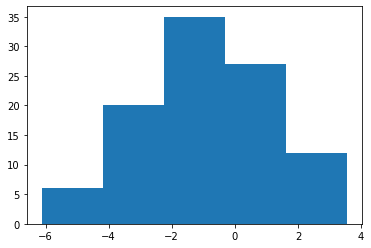

In [4]:
plt.hist(X, bins=5)

(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([-6.10597963, -5.14143074, -4.17688186, -3.21233297, -2.24778408,
        -1.28323519, -0.3186863 ,  0.64586258,  1.61041147,  2.57496036,
         3.53950925]),
 <a list of 10 Patch objects>)

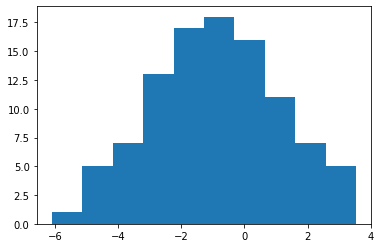

In [5]:
plt.hist(X, bins=10)

(array([ 1.,  1.,  4.,  3.,  7., 10., 11.,  9., 15., 12.,  9.,  6.,  5.,
         4.,  3.]),
 array([-6.10597963, -5.46294704, -4.81991445, -4.17688186, -3.53384926,
        -2.89081667, -2.24778408, -1.60475149, -0.9617189 , -0.3186863 ,
         0.32434629,  0.96737888,  1.61041147,  2.25344406,  2.89647666,
         3.53950925]),
 <a list of 15 Patch objects>)

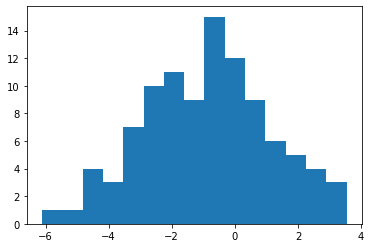

In [6]:
plt.hist(X, bins=15)

(array([ 1.,  0.,  1.,  4.,  3.,  4.,  7.,  6.,  7., 10.,  7., 11., 11.,
         5.,  6.,  5.,  5.,  2.,  3.,  2.]),
 array([-6.10597963, -5.62370519, -5.14143074, -4.6591563 , -4.17688186,
        -3.69460741, -3.21233297, -2.73005852, -2.24778408, -1.76550964,
        -1.28323519, -0.80096075, -0.3186863 ,  0.16358814,  0.64586258,
         1.12813703,  1.61041147,  2.09268592,  2.57496036,  3.0572348 ,
         3.53950925]),
 <a list of 20 Patch objects>)

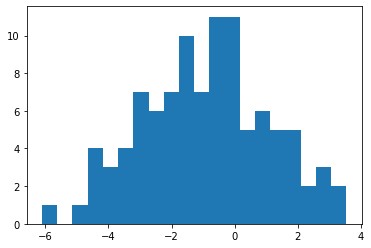

In [7]:
nbins = 20
plt.hist(X, bins=nbins)

In [8]:
def chi2_norm(x, m, std, bins):
    hist, edges = np.histogram(x, bins=bins)
    expected = np.array([])
    for i in range(len(edges)-1):
        expected = np.append(expected, (sts.norm.cdf(edges[i+1], loc=m, scale=std) - sts.norm.cdf(edges[i], loc=m, scale=std))*len(x))
    z, p = sts.chisquare(hist, expected)
    print(bins, z, p)

chi2_norm(X, m, std, 5)
chi2_norm(X, m, std, 10)
chi2_norm(X, m, std, 15)
chi2_norm(X, m, std, nbins)

5 1.8090211236174607 0.7708314749243939
10 3.354625061089422 0.9485627508217382
15 5.663783384294211 0.9742676262107275
20 9.330157123503486 0.9675845891120246


In [9]:
def chi2_uniform(x, bins):
    hist, edges = np.histogram(x, bins=bins)
    a = edges[0]
    b = edges[-1]
    expected = np.array([])
    for i in range(len(edges)-1):
        expected = np.append(expected, (sts.uniform.cdf(edges[i+1], loc=a, scale=b-a) - sts.uniform.cdf(edges[i], loc=a, scale=b-a))*len(x))
    z, p = sts.chisquare(hist, expected)
    print(bins, z, p)


chi2_uniform(X,  5)
chi2_uniform(X,  10)
chi2_uniform(X, 15)
chi2_uniform(X, nbins)

5 26.699999999999996 2.285707049134639e-05
10 30.800000000000004 0.0003203461605300475
15 37.10000000000002 0.0007124586494614104
20 39.20000000000001 0.00416141599759649


In [10]:
def chi2_chis(x, bins):
    hist, edges = np.histogram(x, bins=bins)
    expected = np.array([])
    for i in range(len(edges)-1):
        expected = np.append(expected, (sts.chi2.cdf(edges[i+1], 5) - sts.chi2.cdf(edges[i], 5)) *len(x))
    z, p = sts.chisquare(hist, expected)
    print(bins, z, p)

chi2_chis(X, 5)
chi2_chis(X, 10)
chi2_chis(X, 15)
chi2_chis(X, nbins)


5 inf 0.0
10 inf 0.0
15 inf 0.0
20 nan nan


In [11]:
print(sts.kstest(X, 'norm', args=(m, std)))
A = np.min(X)
B = np.max(X)
print(sts.kstest(X, 'uniform', args=(A, B-A)))
print(sts.kstest(X, 'chi2', args=(5,)))

KstestResult(statistic=0.0582486387238324, pvalue=0.8865884365301941)
KstestResult(statistic=0.18123546706357993, pvalue=0.002400729628946531)
KstestResult(statistic=0.7975733964255145, pvalue=7.922369244908696e-69)


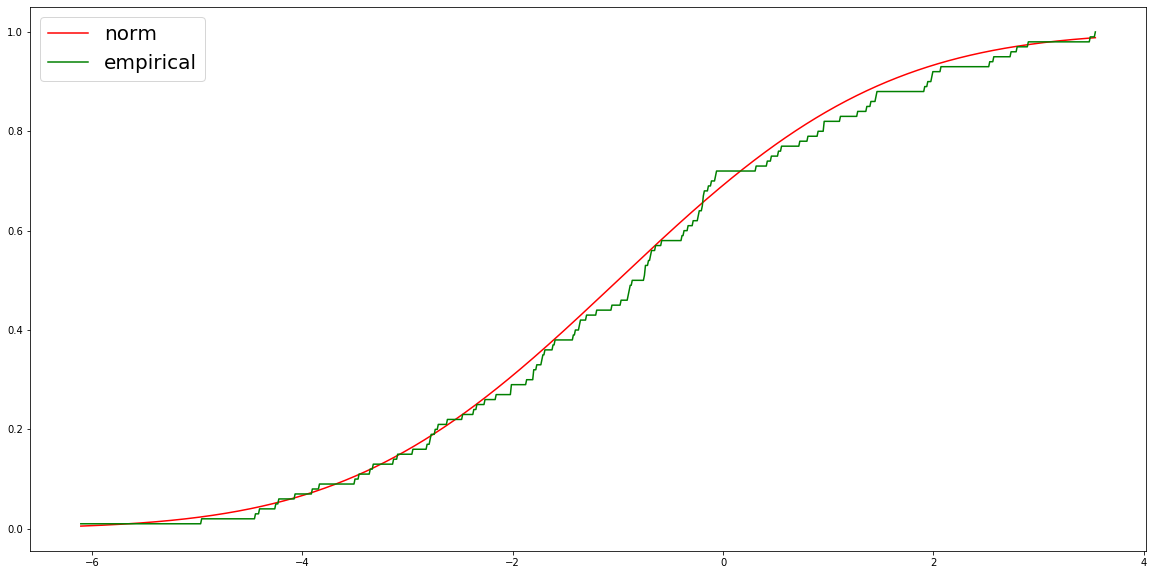

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(X)
x = np.linspace(min(X), max(X), num=1000)
theory = sts.norm.cdf(x, loc=m, scale=std)
empirical = ecdf(x)
plt.figure(figsize=(20,10))
plt.plot(x, theory, 'r', label='norm')
plt.plot(x, empirical, 'g', label='empirical')
plt.legend(loc='higher right', prop={'size':20})

In [13]:
a = -2
b = 0
n2 = 100
m2 = (b + a) / 2
var2= (((b - a)**2) / 12)
std2 =((((b - a)**2) / 12)**0.5)
print(m2, var2)

-1.0 0.3333333333333333


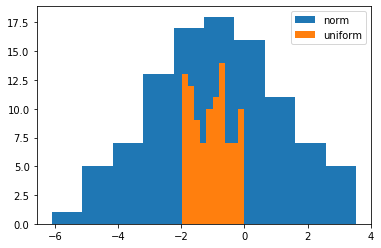

In [14]:
Y = sts.uniform.rvs(loc=a, scale=b-a, size=n2)
plt.hist(X, bins=10, label='norm')
plt.hist(Y, bins=10, label='uniform')
plt.legend(loc='higher right', prop={'size':10})

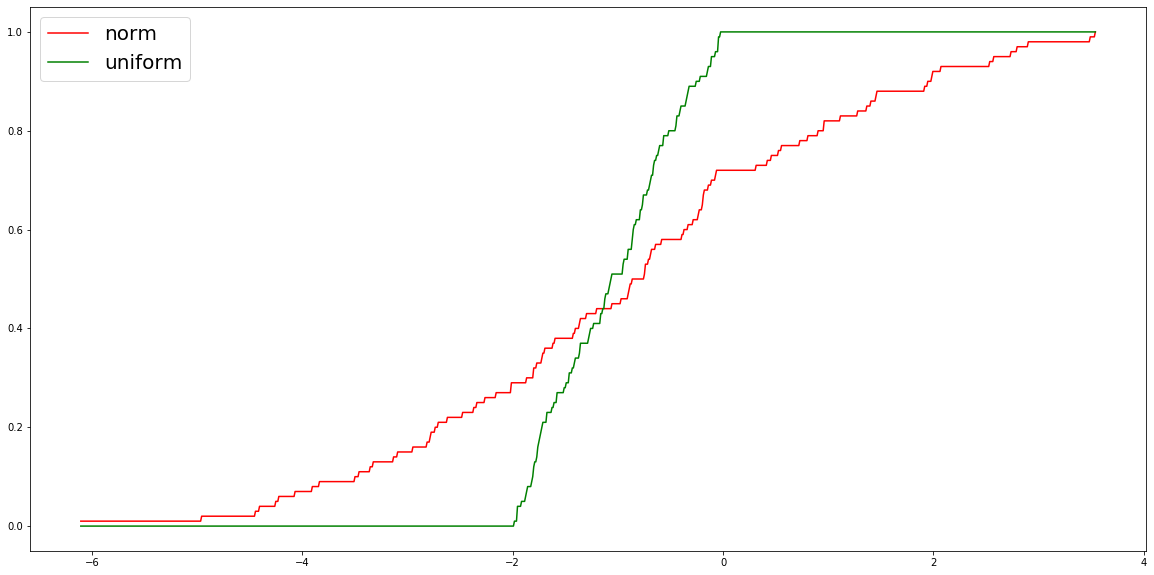

In [15]:
ecdf = ECDF(X)
x = np.linspace(min(X), max(X), num=1000)
norm = ecdf(x)
plt.figure(figsize=(20,10))
plt.plot(x, norm, 'r', label='norm')
ecdf = ECDF(Y)
uniform = ecdf(x)
plt.plot(x, uniform, 'g', label='uniform')
plt.legend(loc='higher right', prop={'size':20})

In [18]:
bins=10
pool = np.concatenate((X, Y))
_, edges = np.histogram(pool, bins=bins)
norm_hist = np.array([])
for i in range(bins):
    norm_hist = np.append(norm_hist, len(X[np.logical_and(X>=edges[i], X<edges[i+1])]))
uni_hist = np.array([])
for i in range(bins):
    uni_hist = np.append(uni_hist, len(X[np.logical_and(Y>=edges[i], Y<edges[i+1])]))
print(sts.chisquare(uni_hist, norm_hist))

Power_divergenceResult(statistic=137.3141339869281, pvalue=3.6961162968863352e-25)


In [19]:
print(sts.ks_2samp(X, Y))

Ks_2sampResult(statistic=0.29, pvalue=0.0004117410017938115)


In [20]:
from statsmodels.stats.descriptivestats import sign_test
print(sign_test(X-Y))

(4.0, 0.4841184136072908)


In [21]:
print(sts.ranksums(X, Y))

RanksumsResult(statistic=0.7818844438803534, pvalue=0.43428248799302427)
